# Развитие игровой индустрии

- Автор: Савина Юлия
- Дата:28/05/2025

## Цели и задачи проекта

- Выделить топ-7 платформ по количеству игр, выпущенных за весь требуемый период.

- Категоризовать игры по оценкам пользователей и экспертов. Выделите три категории:
   - высокая оценка — с оценкой от 8 до 10 и от 80 до 100, включая правые границы интервалов.
   - средняя оценка — с оценкой от 3 до 8 и от 30 до 80, не включая правые границы интервалов.
   - низкая оценка — с оценкой от 0 до 3 и от 0 до 30, не включая правые границы интервалов.

### Содержимое проекта

- Знакомимся с данными
  - Выводим столбцы таблицы и типы данных
  - Выводим само содержимое таблицы
- Предобработка данных
  - приводим столбцы к единому стилю
  - корректируем типы данных
  - работа с пропусками
  - работа с дубликатами
- Фильтрация данных
- Категоризация данных
- Вывод на экран топовых платформ
- Вывод

## 1. Загрузка данных и знакомство с ними

- Загрузим необходимые библиотеки Python и данные датасета `new_games.csv`.


In [1]:
import pandas as pd
import numpy
df = pd.read_csv('datasets/new_games.csv')

Вывод о полученных данных:

Данные занимают 1.4 MB, данные соответсвуют описанию.
В стобцах name, year of release, genre, critic score,user score, rating присутсвуют пропуски.
Year of release, EU sales, JP sales, User Score имеют неверный тип данных

Первые строки таблицы:

In [3]:
display(df.head())

,Name,Platform,Year of Release,Genre,NA sales,EU sales,JP sales,Other sales,Critic Score,User Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


---

## 2.  Проверка ошибок в данных и их предобработка


### Названия, или метки, столбцов датафрейма

- Выведем на экран названия всех столбцов датафрейма и проверим их стиль написания.

In [4]:
print(df.columns)

Index(['Name', 'Platform', 'Year of Release', 'Genre', 'NA sales', 'EU sales',
       'JP sales', 'Other sales', 'Critic Score', 'User Score', 'Rating'],
      dtype='object')


- Приведем названия столбцов к стилю snake case. Названия теперь в нижнем регистре, а вместо пробелов — подчёркивания.

In [5]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_') 
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


- Приведем столбцы к стилю snake case. Названия теперь в нижнем регистре, а вместо пробелов — подчёркивания.

In [6]:
def low(column):
    if column.dtype == 'object':
        column = column.str.lower()
        return column.str.replace(' ', '_')
    return column
df = df.apply(low,axis=0)
print(df)

                                name platform  year_of_release         genre  \
0                         wii_sports      wii           2006.0        sports   
1                  super_mario_bros.      nes           1985.0      platform   
2                     mario_kart_wii      wii           2008.0        racing   
3                  wii_sports_resort      wii           2009.0        sports   
4           pokemon_red/pokemon_blue       gb           1996.0  role-playing   
...                              ...      ...              ...           ...   
16951  samurai_warriors:_sanada_maru      ps3           2016.0        action   
16952               lma_manager_2007     x360           2006.0        sports   
16953        haitaka_no_psychedelica      psv           2016.0     adventure   
16954               spirits_&_spells      gba           2003.0      platform   
16955            winning_post_8_2016      psv           2016.0    simulation   

       na_sales eu_sales jp_sales  othe

### Типы данных

Некорретктные типы данных могут образоваться из за пропусков.

- В числовых столбцах могут встретиться строковые значения, например `unknown` или другие. Приведем такие столбцы к числовому типу данных, заменив строковые значения на пропуски.

In [7]:
df['na_sales'] = pd.to_numeric(df['na_sales'], errors = 'coerce')
df['eu_sales'] = pd.to_numeric(df['eu_sales'], errors = 'coerce')
df['jp_sales'] = pd.to_numeric(df['jp_sales'], errors = 'coerce')
df['other_sales'] = pd.to_numeric(df['other_sales'], errors = 'coerce')
df['critic_score'] = pd.to_numeric(df['critic_score'], errors = 'coerce')
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')
for col in df.columns.tolist():
    print(col, df[col].dtype)

name object
platform object
year_of_release float64
genre object
na_sales float64
eu_sales float64
jp_sales float64
other_sales float64
critic_score float64
user_score float64
rating object


### Наличие пропусков в данных

- Посчитайте количество пропусков в каждом столбце в абсолютных и относительных значениях.


In [8]:
for column in df.columns:
    print(f'столбец {column} имеет {df[column].isna().sum()} пропусков и {round(df[column].isna().mean(),2)}%')

столбец name имеет 2 пропусков и 0.0%
столбец platform имеет 0 пропусков и 0.0%
столбец year_of_release имеет 275 пропусков и 0.02%
столбец genre имеет 2 пропусков и 0.0%
столбец na_sales имеет 0 пропусков и 0.0%
столбец eu_sales имеет 6 пропусков и 0.0%
столбец jp_sales имеет 4 пропусков и 0.0%
столбец other_sales имеет 0 пропусков и 0.0%
столбец critic_score имеет 8714 пропусков и 0.51%
столбец user_score имеет 9268 пропусков и 0.55%
столбец rating имеет 6871 пропусков и 0.41%


Всего 2 пропуска в столбцах name, genre - это 0% от общего кол-ва строк.Поэтому удалим строки с пропусками в этих строках.

In [9]:
df.dropna(subset =['name'],inplace=True)
df.dropna(subset =['genre'],inplace=True)

Всего 4 пропуска в столбце jp sales, 6 пропусков в eu_sales - это 0% от общего кол-ва строк. Поэтому заменим пропуски на среднее значение по игровой платформе и году выхода игры. Такой подход сохранит максимум информации в данных и позволит более точно интерпретировать результаты последующего анализа.

In [10]:
df['jp_sales'] = df['jp_sales'].fillna(
    df.groupby(['platform','year_of_release'])['jp_sales'].transform('mean'))

df['eu_sales'] = df['eu_sales'].fillna(
    df.groupby(['platform','year_of_release'])['eu_sales'].transform('mean'))


В стобцах year of release,eu_sales, jp_sales, critic score,user score, rating остались пропуски.

В столбцах Critic score,user score,rating пропусков больше 40%!

В стобце critic score пропуски заменим на '-1', чтобы корректно преобразовать год в нужный тип данных и '-1' не исказит результаты. Сделаем это для преобразования типа данных.

In [11]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['critic_score'] = df['critic_score'].astype('int64')

Пропуски в столбце rating не влияют на вычисления,поэтому заменим пропуски на 'no rating'

In [12]:
df['rating'] = df['rating'].fillna('no_rating')

В стобце year of release пропуски заменим на '0', чтобы корректно преобразовать год в нужный тип данных и '0' не исказит результаты. Год важен для дальнейшего исследования, строки нельзя удалить или заменить на что-то среднее.

In [13]:
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'] = df['year_of_release'].astype('int64')

Такой большой процент пропусков в user score скорее всего из за желания людей поиграть, 
они могут закрывать окно с оценкой как можно быстрее, так как голосование не является обязательным.

In [14]:
df['user_score'] = df['user_score'].fillna(-1)
df['critic_score'] = df['critic_score'].fillna(-1)

### Явные и неявные дубликаты в данных

Изучим столбцы c категориальными данными на уникальность.

- Попытаемся найти неявные дубликаты:

platform, genre, rating:

In [15]:
list = ['platform','genre','rating']
for col in list:
    df[col] = df[col].str.strip()
    print(col, sorted(df[col].unique()))
print('year_of_release',sorted(df['year_of_release'].unique()))

platform ['2600', '3do', '3ds', 'dc', 'ds', 'gb', 'gba', 'gc', 'gen', 'gg', 'n64', 'nes', 'ng', 'pc', 'pcfx', 'ps', 'ps2', 'ps3', 'ps4', 'psp', 'psv', 'sat', 'scd', 'snes', 'tg16', 'wii', 'wiiu', 'ws', 'x360', 'xb', 'xone']
genre ['action', 'adventure', 'fighting', 'misc', 'platform', 'puzzle', 'racing', 'role-playing', 'shooter', 'simulation', 'sports', 'strategy']
rating ['ao', 'e', 'e10+', 'ec', 'k-a', 'm', 'no_rating', 'rp', 't']
year_of_release [0, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


Неявные дубликаты не были выявлены.

In [16]:
df['rating']= df['rating'].str.upper()

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v1:</b> 
    
Здесь все верно. Здорово, что получилось обновить значения в столбцах `genre`.

- Попытаемся найти явные дубликаты:

In [17]:
duplic = df.duplicated().sum()

In [18]:
df_cleaned = df.drop_duplicates(keep='first')
df_cleaned = df_cleaned.reset_index(drop=True)

In [19]:
before = df.shape[0]
after = df_cleaned.shape[0]
print(f"""Записей до: {before}, после удаления дубликатов: {after}
Удалено: {before-after} или {round((before-after)/before,2)}    """)

Записей до: 16954, после удаления дубликатов: 16713
Удалено: 241 или 0.01    


Количество найденных дубликатов: 241. Они были удалены.

Пропуски данных, которые составляют малую часть данных мы удалили, так как они не сильно будут влиять на результаты исследования. Остальные пропуски заполнили данными, которые будет легко отследить.

---

## 3. Фильтрация данных

Коллеги хотят изучить историю продаж игр в начале XXI века, и их интересует период с 2000 по 2013 год включительно. Отберите данные по этому показателю. Сохраните новый срез данных в отдельном датафрейме, например `df_actual`.

In [20]:
df_cleaned = df_cleaned[(df_cleaned['year_of_release']>=2000) & (df_cleaned['year_of_release']<=2013)]
df_actual = df_cleaned

---

## 4. Категоризация данных
    
Проведите категоризацию данных:
- Разделите все игры по оценкам пользователей и выделите такие категории: высокая оценка (от 8 до 10 включительно), средняя оценка (от 3 до 8, не включая правую границу интервала) и низкая оценка (от 0 до 3, не включая правую границу интервала).

In [21]:
bins = [0, 3, 8, 10]
labels = ["Низкая оценка", "Средняя оценка", "Высокая оценка"]

df_actual['user_category'] = pd.cut(
    df_actual['critic_score'], 
    bins=bins, 
    labels=labels, 
    right=False
)


df_actual['user_category'] = df_actual['user_category'].cat.add_categories(["Other", "нет оценки"]).fillna("нет оценки")

- Разделите все игры по оценкам критиков и выделите такие категории: высокая оценка (от 80 до 100 включительно), средняя оценка (от 30 до 80, не включая правую границу интервала) и низкая оценка (от 0 до 30, не включая правую границу интервала).

In [22]:
bins = [0, 30, 80, 100]
labels = ["Низкая оценка", "Средняя оценка", "Высокая оценка"]

df_actual['critic_category'] = pd.cut(
    df_actual['critic_score'], 
    bins=bins, 
    labels=labels, 
    right=False
)


df_actual['critic_category'] = df_actual['critic_category'].cat.add_categories(["Other", "нет оценки"]).fillna("нет оценки")

- После категоризации данных проверьте результат: сгруппируйте данные по выделенным категориям и посчитайте количество игр в каждой категории.

In [23]:
user_score_category_counts = df_actual.groupby('user_category')['user_score'].count()
print(user_score_category_counts[1:])

user_category
Средняя оценка        0
Высокая оценка        0
Other                 0
нет оценки        12781
Name: user_score, dtype: int64


In [24]:
critic_score_category_counts = df_actual.groupby('critic_category')['critic_score'].count()
print(critic_score_category_counts[1:])

critic_category
Средняя оценка    5422
Высокая оценка    1692
Other                0
нет оценки        5612
Name: critic_score, dtype: int64


- Выделите топ-7 платформ по количеству игр, выпущенных за весь актуальный период.

In [25]:
platform_count = df_actual.groupby('platform')['name'].count()
top_platforms = platform_count.sort_values(ascending=False).head(7)
print(platform_count.sort_values(ascending=False).head(7))

platform
ps2     2127
ds      2120
wii     1275
psp     1180
x360    1121
ps3     1087
gba      811
Name: name, dtype: int64


Топ 7 платформ по количеству выпущенных игр:
1. ps2     
2. ds      
3. wii     
4. psp     
5. x360    
6. ps3     
7. gba

# Визуализация топ-7 платформ

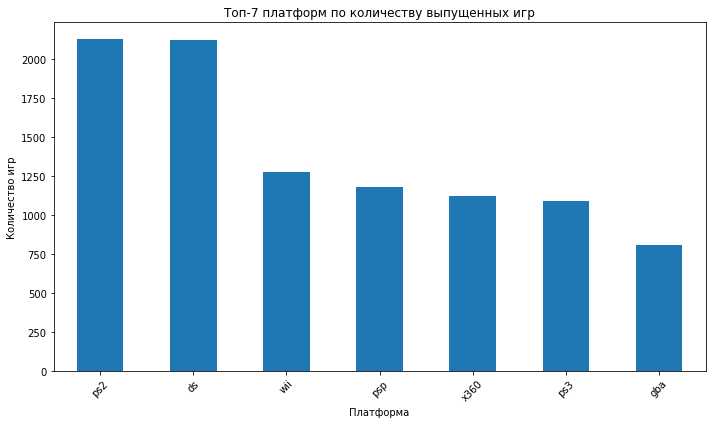

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
top_platforms.plot(kind='bar') # нужно поменять на свой датафрейм
plt.title('Топ-7 платформ по количеству выпущенных игр')
plt.xlabel('Платформа')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
print(df_actual.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12781 entries, 0 to 16711
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             12781 non-null  object  
 1   platform         12781 non-null  object  
 2   year_of_release  12781 non-null  int64   
 3   genre            12781 non-null  object  
 4   na_sales         12781 non-null  float64 
 5   eu_sales         12781 non-null  float64 
 6   jp_sales         12781 non-null  float64 
 7   other_sales      12781 non-null  float64 
 8   critic_score     12781 non-null  int64   
 9   user_score       12781 non-null  float64 
 10  rating           12781 non-null  object  
 11  user_category    12781 non-null  category
 12  critic_category  12781 non-null  category
dtypes: category(2), float64(5), int64(2), object(4)
memory usage: 1.2+ MB
None


---

## 5. Итоговый вывод

В конце напишите основной вывод и отразите, какую работу проделали. Не забудьте указать описание среза данных и новых полей, которые добавили в исходный датасет.

Топ 7 платформ по количеству выпущенных игр:
1. ps2     
2. ds      
3. wii     
4. psp     
5. x360    
6. ps3     
7. gba
- Большинство игр, выпущенных с 2000 по 2013 год, имеют среднюю оценку по мнению критиков и поьзователей. Реже ставят отрицательные оценки, в этом плане пользователи выставили таких оценок в 2 раза больше чем критики. Возможно, это может быть связано с эмоциональной точки зрения, при неудаче в игре, оставляют негативную оценку.